# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('08-x_train-IEMOCAP_RAVDESS-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('08-x_test-IEMOCAP_RAVDESS-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('08-y_train-IEMOCAP_RAVDESS-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('08-y_test-IEMOCAP_RAVDESS-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)


# **SELECCION DE CARACTERISTICAS**

In [3]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [4]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [5]:
overs = RandomOverSampler()

In [6]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [7]:
y_t_overs

,Emociones
0,2
1,3
2,3
3,1
4,2
...,...
3779,3
3780,3
3781,3
3782,3


# **NORMALIZACION DE CARACTERISTICAS**

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [9]:
x_train_std

array([[-0.15550606, -0.3493065 ,  0.47767745, ..., -0.21391803,
        -0.26491375,  0.62239255],
       [-0.83608569, -0.92436824,  0.53633827, ..., -0.44814025,
         0.03364348, -2.47753363],
       [-0.81534416, -0.21731426,  0.12353671, ..., -1.07703884,
        -0.39102461, -0.81354468],
       ...,
       [-0.98825872, -0.36805374,  0.5488449 , ..., -1.33063975,
         0.67645854, -3.7626824 ],
       [-0.67753535, -1.26626409,  0.92009851, ..., -0.09957163,
        -0.20047438,  0.57039977],
       [-0.905568  , -1.01605201,  0.93655578, ..., -1.41725599,
         0.53560656, -2.27195749]])

In [10]:
y_t_overs

,Emociones
0,2
1,3
2,3
3,1
4,2
...,...
3779,3
3780,3
3781,3
3782,3


# **MODELO DE MARCHINE LEARNING**

In [11]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               11776     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 81,700
Trainable params: 81,700
Non-trainable params: 0
_________________________________________________________________


In [12]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_t_overs)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I

Epoch 1/800
119/119 [==============================] - 1s 4ms/step - loss: 0.9803 - accuracy: 0.5674
Epoch 2/800
119/119 [==============================] - 0s 4ms/step - loss: 0.8371 - accuracy: 0.6422
Epoch 3/800
119/119 [==============================] - 0s 3ms/step - loss: 0.7617 - accuracy: 0.6839
Epoch 4/800
119/119 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.7043
Epoch 5/800
119/119 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.7392
Epoch 6/800
119/119 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.7635
Epoch 7/800
119/119 [==============================] - 0s 4ms/step - loss: 0.5564 - accuracy: 0.7833
Epoch 8/800
119/119 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7970
Epoch 9/800
119/119 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.8192
Epoch 10/800
119/119 [==============================] - 0s 3ms/step - loss: 0.4486 - accura

array([2, 3, 1, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2, 3, 0, 1, 3, 3, 2, 2, 0, 0,
       2, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 2, 3, 0, 2, 0, 2, 3, 3, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 0, 2, 3, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 3, 2, 3, 2, 3, 0, 3, 2, 1, 3, 2, 2, 2, 3, 2, 3, 0, 2,
       2, 2, 3, 2, 3, 0, 3, 1, 2, 0, 2, 2, 1, 3, 0, 2, 1, 2, 2, 2, 2, 3,
       2, 0, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 0, 3, 3, 3, 1, 3,
       1, 3, 2, 3, 3, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 3, 0, 2, 2,
       3, 2, 2, 2, 3, 3, 1, 3, 2, 2, 2, 2, 3, 2, 0, 3, 3, 2, 2, 2, 2, 1,
       0, 2, 3, 0, 1, 3, 2, 0, 2, 1, 2, 3, 3, 1, 3, 3, 2, 2, 2, 0, 1, 2,
       3, 2, 3, 2, 1, 0, 1, 1, 3, 2, 2, 0, 3, 2, 3, 0, 1, 1, 1, 3, 1, 2,
       0, 3, 1, 3, 3, 2, 2, 2, 0, 3, 0, 3, 3, 1, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 1, 3, 2, 0, 0, 0, 3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2,
       1, 2, 3, 1, 3, 2, 1, 2, 2, 0, 2, 2, 0, 3, 0,

# **EVALUACION**

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71        81
           1       0.55      0.46      0.50       101
           2       0.67      0.68      0.68       237
           3       0.65      0.68      0.66       160

    accuracy                           0.65       579
   macro avg       0.64      0.64      0.64       579
weighted avg       0.64      0.65      0.64       579



In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.67      0.74      0.71        81
           1       0.55      0.46      0.50       101
           2       0.67      0.68      0.68       237
           3       0.65      0.68      0.66       160

    accuracy                           0.65       579
   macro avg       0.64      0.64      0.64       579
weighted avg       0.64      0.65      0.64       579

Matriz de confusión, sin normalización
[[ 60   3  16   2]
 [ 15  46  27  13]
 [ 11  22 161  43]
 [  3  13  36 108]]


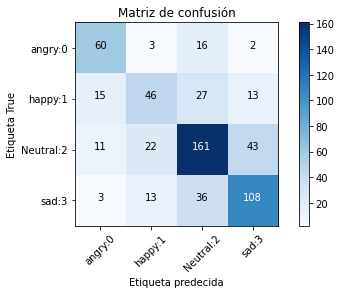

In [15]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')